# Churn & Poison Prediction Models


## Data

### Business Churn
We're going to be using a **business churn dataset** (streaming.csv) to help a streaming service predict whether customers will "churn" (a.k.a. stop being a customer).

- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `income`: self-reported annual income in thousands
- `monthssubbed`: months subscribed to the service.
- `plan`: the plan the user is currently subscribed to, `P` for premium, `A` for ad-free, `B` for basic (with ads)
- `meanhourswatched`: mean hours of content watched per month
- `competitorsub`: whether or not the customer is subscribed to your competitor's streaming service `0` for no, `1` for yes
- `topgenre`: most common genre of content the user watches, includes many categories.
- `secondgenre`: second most common genre of content the user watches, includes many categories.
- `numprofiles`: number of user profiles associated with the account.
- `cancelled`: whether or not the user has cancelled the servce in the past, `0` for no, `1` for yes
- `downgraded`: whether or not the user has downgraded the servce at some point in the past (Premium is the highest plan, then Ad Free, then Basic), `0` for no, `1` for yes
- `bundle`: whether or not the user purchased their plan as a "bundle" with another service, `0` for no, `1` for yes
- `kids`: whether or not the user has an active Kids profile on their account, `0` for no, `1` for yes
- `longestsession`: the length of the longest watch session from the user, in minutes
- `churn`: whether or not the customer has "churned" (i.e. left the service), `0` for no, `1` for yes


### Mushroom Classification

We are going to use a [mushroom dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification) from UCI to determine whether a mushroom is poisonous. The dataset contains many columns, the first a binary indicator (e - edible, p - poisonous) and the following categorical measures of the mushroom's appearance.

- `cap-shape`: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

- `cap-surface`: fibrous=f, grooves=g, scaly=y, smooth=s

- `cap-color`: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

- `bruises`: bruises=t, no=f

- `odor`: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

- `gill-attachment`: attached=a, descending=d, free=f, notched=n

- `gill-spacing`: close=c, crowded=w, distant=d

- `gill-size`: broad=b, narrow=n

- `gill-color`: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

- `stalk-shape`: enlarging=e, tapering=t

- `stalk-root`: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

- `stalk-surface-above-ring`: fibrous=f, scaly=y, silky=k, smooth=s

- `stalk-surface-below-ring`: fibrous=f, scaly=y, silky=k, smooth=s

- `stalk-color-above-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- `stalk-color-below-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- `veil-type`: partial=p, universal=u

- `veil-color`: brown=n, orange=o, white=w, yellow=y

- `ring-number`: none=n, one=o, two=t

- `ring-type`: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

- `spore-print-color`: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

- `population`: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

- `habitat`: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

import matplotlib.pyplot as plt


# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer #Z-score variables
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB, CategoricalNB

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# model validation imports
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import GridSearchCV


# Business Churn

In [ ]:
# load business churn data
bus_churn = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/streaming.csv")
bus_churn.head()

,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre,churn
0,woman,38.0,92.29,35,P,9.34,0,1,0.0,0,0,1,130.39,Drama,Thriller,0
1,woman,43.0,63.40,41,P,11.36,0,2,0.0,0,1,1,144.10,Horror,RomanticComedy,0
2,nonbinary,54.0,54.87,59,A,11.82,1,2,0.0,0,0,1,256.46,ScienceFiction,Comedy,1
3,woman,46.0,89.20,41,B,46.89,1,2,1.0,1,1,0,47.66,RomanticComedy,ScienceFiction,1
4,man,42.0,75.61,17,A,39.18,1,2,0.0,0,0,0,137.22,Comedy,Drama,0


In [ ]:
bus_churn.columns

Index(['gender', 'age', 'income', 'monthssubbed', 'plan', 'meanhourswatched',
       'competitorsub', 'numprofiles', 'cancelled', 'downgraded', 'bundle',
       'kids', 'longestsession', 'topgenre', 'secondgenre', 'churn'],
      dtype='object')

In [ ]:
# check for null values
bus_churn.isnull().sum()


# drop missing values
bus_churn.dropna(inplace = True)
bus_churn.reset_index(drop = True, inplace = True)


# separate X and Y values

# list of predictors
predictors = ["age","income","monthssubbed","meanhourswatched","numprofiles","longestsession"]


X = bus_churn[predictors]
y = bus_churn["churn"]


# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 40) # 90/10


# one-hot encoding for categorical variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)


# z-score
scaler = StandardScaler()

X_train_2 = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) # z-score X Train
X_test_2 = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # z-score X test using same mu and sd as train
# data leakage - make sure to tts before z score


Train Accuracy  :  0.72750669495357
Train Recall    :  0.17612968591691996
Train Prescision:  0.5777718691837277
Train ROC AUC   :  0.6936268884429777

Test Accuracy   :  0.7268648930620761
Test Recall     :  0.18233821952091528
Test Prescision :  0.6064209274673008
Test ROC AUC    :  0.7003523010279766


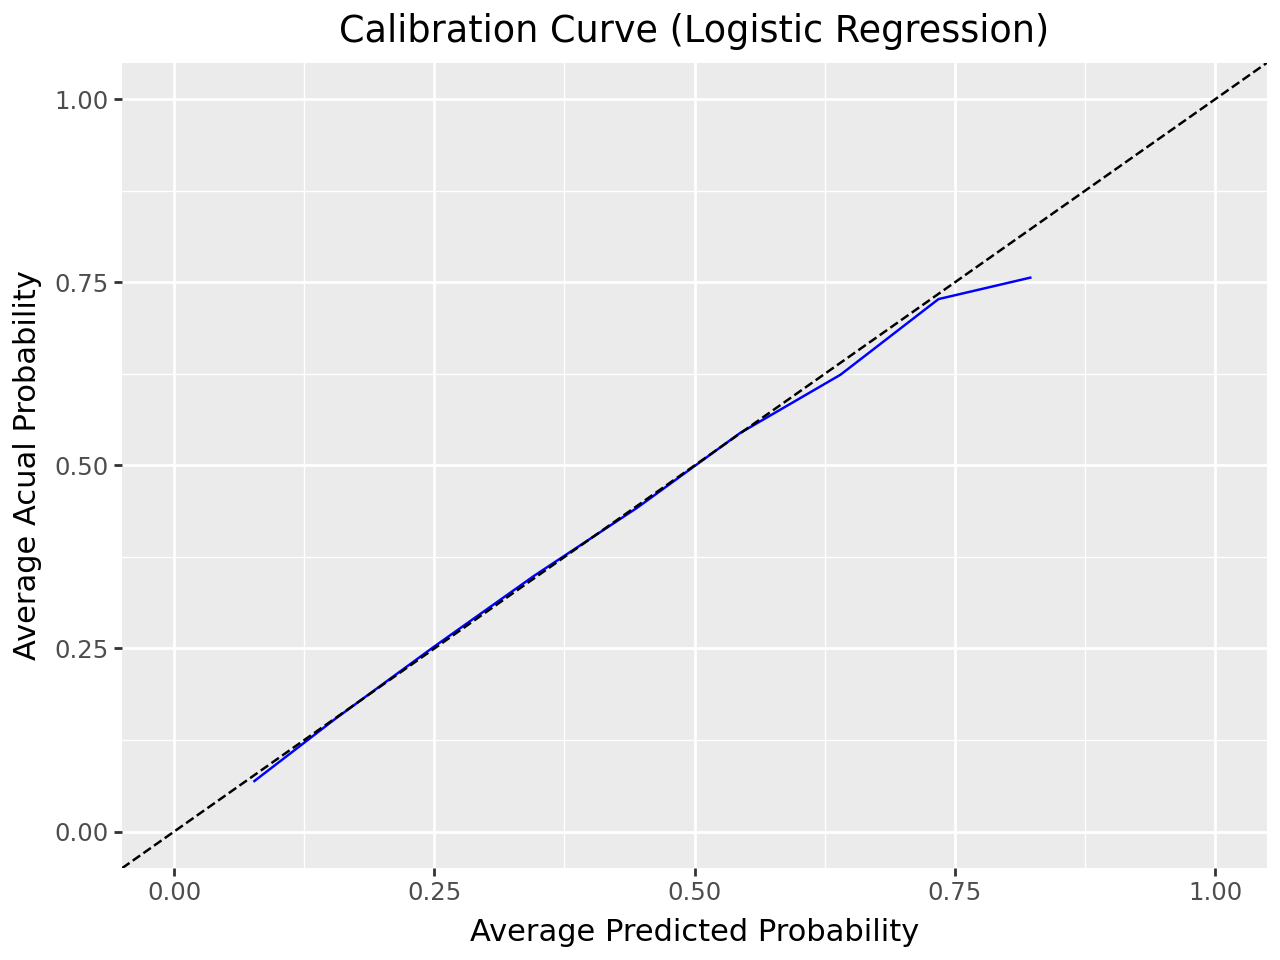

In [ ]:
# LOGISTIC REGRESSION model
lr = LogisticRegression()


# fit the model
lr.fit(X_train_2, y_train)


# predict for both train and test sets
y_pred_train = lr.predict(X_train_2)
y_pred_test = lr.predict(X_test_2)

y_pred_train_prob = lr.predict_proba(X_train_2)[:,1]
y_pred_test_prob = lr.predict_proba(X_test_2)[:,1]


# assess
print("Train Accuracy  : ", accuracy_score(y_train, y_pred_train))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))

print("")

print("Test Accuracy   : ", accuracy_score(y_test, y_pred_test))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))


# Calibration Curve (Logistic Regression)
prob_true, prob_pred = calibration_curve(y_train, y_pred_train_prob, n_bins=10)

(ggplot() + geom_line(aes(x = prob_pred, y = prob_true), color = "blue")
+ geom_abline(slope = 1, intercept = 0, color = "black", linetype = "dashed") +
labs(x = "Average Predicted Probability",
     y = "Average Acual Probability",
     title = "Calibration Curve (Logistic Regression)") +
ylim([0,1]) + xlim([0,1]))


Train Accuracy  :  0.7294195388307307
Train Recall    :  0.1718743667679838
Train Prescision:  0.5933958304183573
Train ROC AUC   :  0.6993026596995022

Test Accuracy   :  0.7268648930620761
Test Recall     :  0.17518770110833035
Test Prescision :  0.6117353308364545
Test ROC AUC    :  0.6991557110710208


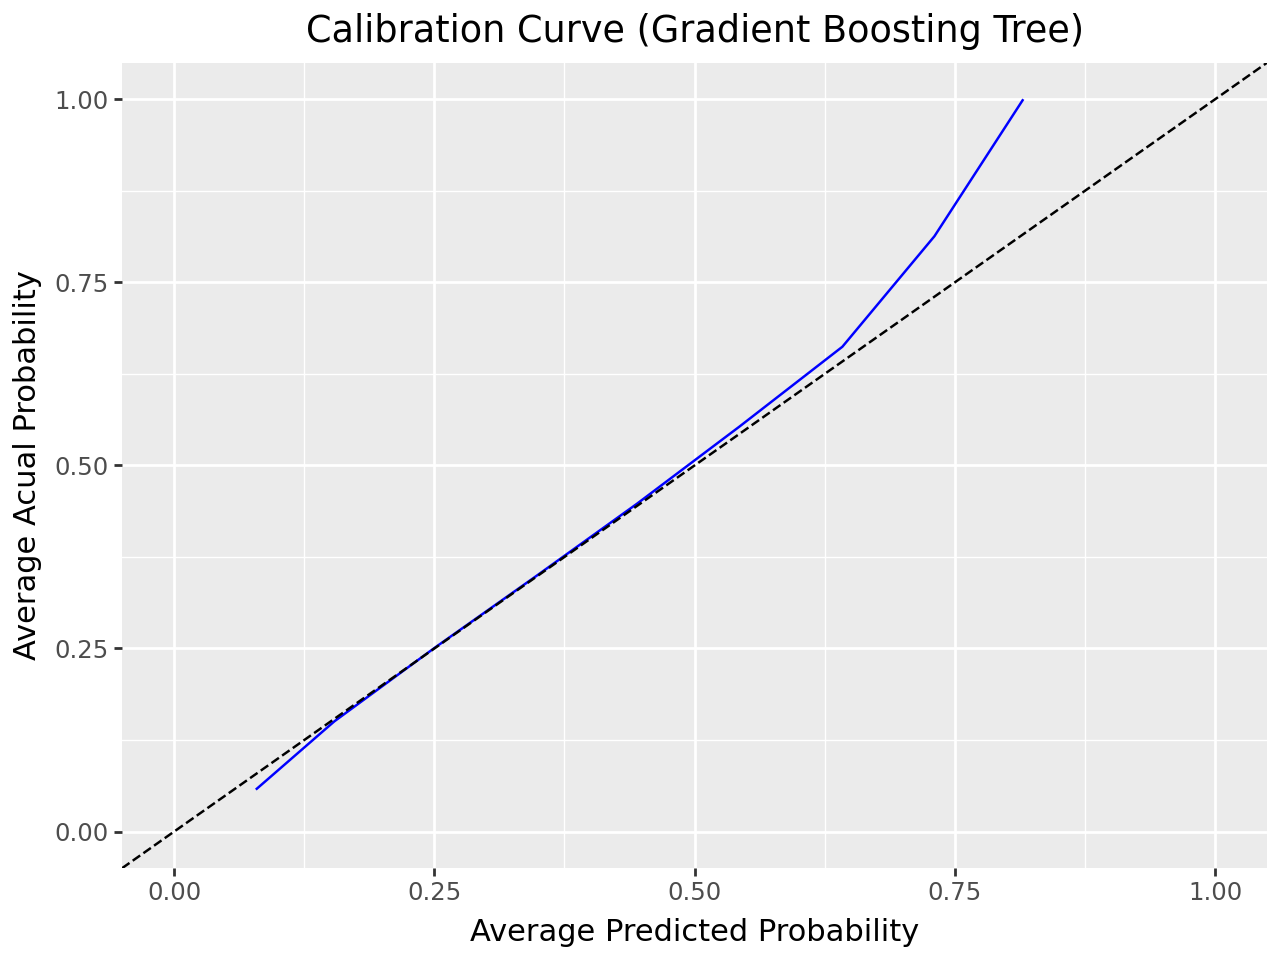

In [ ]:
# GRADIENT BOOSTING TREE model
tree = GradientBoostingClassifier()


# fit the model
tree.fit(X_train_2, y_train)


# predict for both train and test sets
y_pred_train2 = tree.predict(X_train_2)
y_pred_test2 = tree.predict(X_test_2)

y_pred_train_prob2 = tree.predict_proba(X_train_2)[:,1]
y_pred_test_prob2 = tree.predict_proba(X_test_2)[:,1]


# assess
print("Train Accuracy  : ", accuracy_score(y_train, y_pred_train2))
print("Train Recall    : ", recall_score(y_train, y_pred_train2))
print("Train Prescision: ", precision_score(y_train, y_pred_train2))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob2))

print("")

print("Test Accuracy   : ", accuracy_score(y_test, y_pred_test2))
print("Test Recall     : ", recall_score(y_test, y_pred_test2))
print("Test Prescision : ", precision_score(y_test, y_pred_test2))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob2))


# Calibration Curve (Gradient Boosting Tree)
prob_true, prob_pred = calibration_curve(y_train, y_pred_train_prob2, n_bins=10)

(ggplot() + geom_line(aes(x = prob_pred, y = prob_true), color = "blue")
+ geom_abline(slope = 1, intercept = 0, color = "black", linetype = "dashed") +
labs(x = "Average Predicted Probability",
     y = "Average Acual Probability",
     title = "Calibration Curve (Gradient Boosting Tree)") +
ylim([0,1]) + xlim([0,1]))

In [ ]:
# got help from ChatGPT :,)

# ensure that y_pred_test_prob2 corresponds to the test set and has the same length
# check the shapes to ensure they align
print(f"Shape of bus_churn: {bus_churn.shape}")
print(f"Shape of y_pred_test_prob2: {len(y_pred_test_prob2)}")

# create a new column "predicted_prob" only for the test set
bus_churn.loc[X_test.index, "predicted_prob"] = y_pred_test_prob2

# summing the churn probabilities by genre
genre_prob_sum = {}

for genre in bus_churn["topgenre"].unique():
    genre_prob_sum[genre] = bus_churn[bus_churn["topgenre"] == genre]["predicted_prob"].sum()

# get the top 5 genres based on the summed churn prediction probabilities
top_genres = sorted(genre_prob_sum, key=genre_prob_sum.get, reverse=True)[:5]

print("Top 5 Genres based on predicted churn probability sum:", top_genres)

Shape of bus_churn: (95844, 16)
Shape of y_pred_test_prob2: 9585
Top 5 Genres based on predicted churn probability sum: ['Comedy', 'Thriller', 'Drama', 'ScienceFiction', 'RomanticComedy']


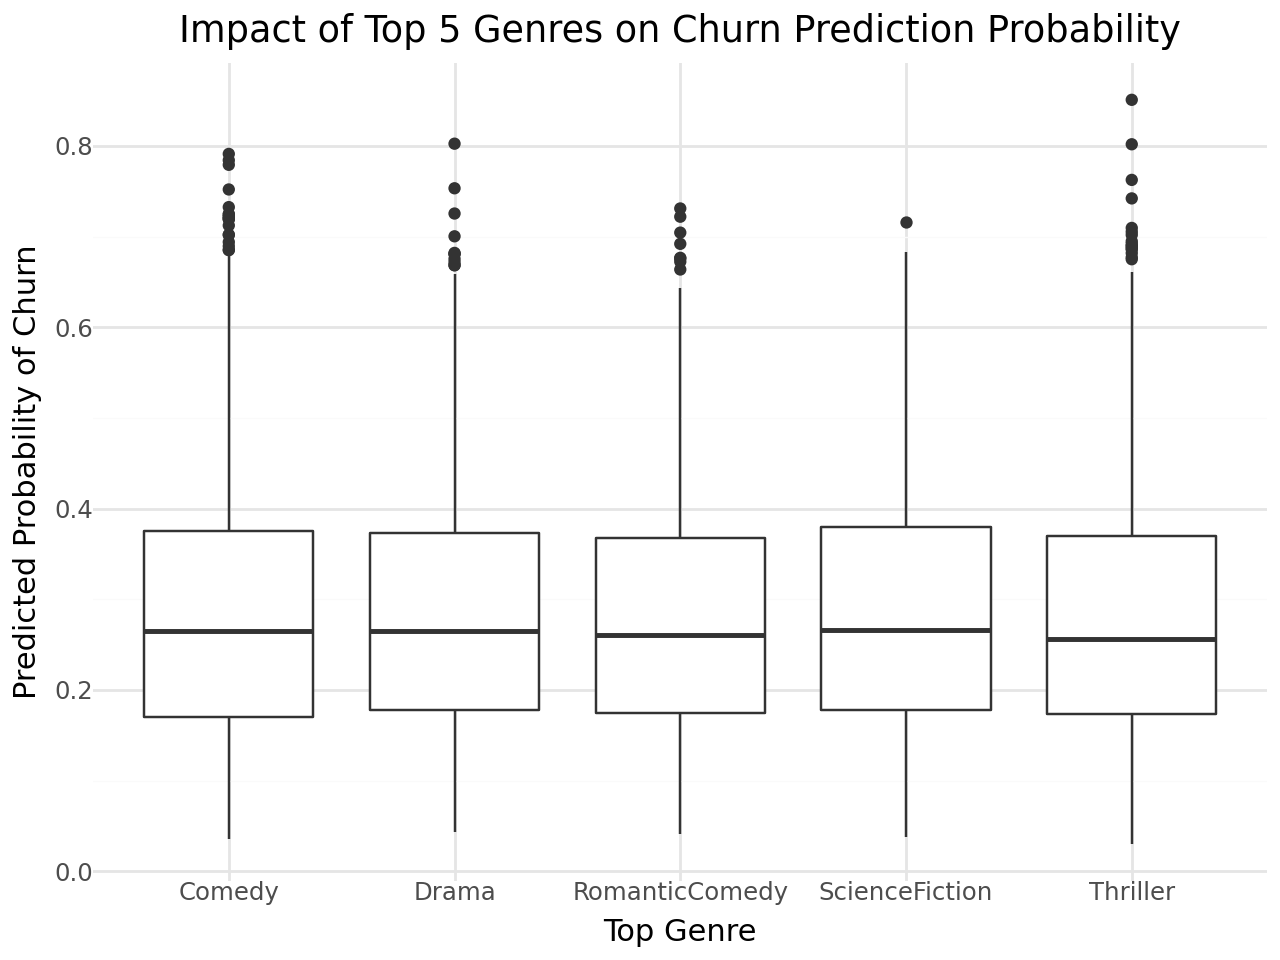

In [ ]:
# also got some help from ChatGPT here...

# filter the data using .loc with the specified genres
filtered_data = bus_churn.loc[(bus_churn["topgenre"] == "Comedy") |
                              (bus_churn["topgenre"] == "Thriller") |
                              (bus_churn["topgenre"] == "Drama") |
                              (bus_churn["topgenre"] == "ScienceFiction") |
                              (bus_churn["topgenre"] == "RomanticComedy")]

# plot
(ggplot(filtered_data, aes(x='topgenre', y='predicted_prob'))
+ geom_boxplot()
+ labs(title="Impact of Top 5 Genres on Churn Prediction Probability",
       x="Top Genre",
       y="Predicted Probability of Churn")
+ theme_minimal())


In [ ]:
# DO NOT RUN
# inital attempt at the top 5 genres
#TOP 5 GENRES

# identify top 5 most common genres in test set
#add new data frames
bus_churn["pred_prob"] = y_pred_test_prob2

#find top 5 genres
#take sum of all all genres, choose the top 5 biggest sums
for loops


#filter df of top 5 genres
df.loc (filter by condition, want rows where topgenre = horror or topgenre =)

# plot
ggplot(test_data_top_genres, aes("topgenre", "churn"))
+ geom_boxplot
+ labs(title="Impact of Top 5 Genres on Churn Prediction",
       x="Top Genre",
       y="Predicted Probability of Churn")
+ theme_minimal()

# Mushroom Classification

In [ ]:
# load mushroom classification data
mushroom = pd.read_csv("mushrooms.csv")
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
# check for null values
mushroom.isnull().sum()


# drop missing values
mushroom.dropna(inplace = True)
mushroom.reset_index(drop = True, inplace = True)


# separate X and Y values

# list of predictors
predictors = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
              'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
              'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
              'stalk-surface-below-ring', 'stalk-color-above-ring',
              'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
              'ring-type', 'spore-print-color', 'population', 'habitat']


X = mushroom[predictors]
y = mushroom["class"]


# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40) # 90/10


# one-hot encoding for categorical variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
# ensures both X_train and X_test have the same columns by filling any missing columns in X_test with zeros

# z-score
scaler = StandardScaler()

X_train_2 = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) # z-score X Train
X_test_2 = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # z-score X test using same mu and sd as train
# data leakage - make sure to tts before z score


In [ ]:
# CategoricalNB

# define model
nb = CategoricalNB()

# fit the model
# only categorical/binary variables
X_train_nb = X_train.select_dtypes(include=['uint8', 'bool'])
X_test_nb = X_test[X_train_nb.columns]  # make sure columns match
nb.fit(X_train_nb, y_train)

# predict for both train and test sets
y_pred_train_nb = nb.predict(X_train_nb)
y_pred_test_nb = nb.predict(X_test_nb)

# predicted probabilities for ROC AUC (probability of "poisonous" class)
y_pred_train_prob_nb = nb.predict_proba(X_train_nb)[:, 1]
y_pred_test_prob_nb = nb.predict_proba(X_test_nb)[:, 1]

# assess
print("Train Accuracy  : ", accuracy_score(y_train, y_pred_train_nb))
print("Train Recall    : ", recall_score(y_train, y_pred_train_nb, pos_label='p'))
print("Train Precision : ", precision_score(y_train, y_pred_train_nb, pos_label='p'))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob_nb))

print("")

print("Test Accuracy   : ", accuracy_score(y_test, y_pred_test_nb))
print("Test Recall     : ", recall_score(y_test, y_pred_test_nb, pos_label='p'))
print("Test Precision  : ", precision_score(y_test, y_pred_test_nb, pos_label='p'))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob_nb))

Train Accuracy  :  0.9396830281581782
Train Recall    :  0.8863708905202681
Train Precision :  0.9872022751510843
Train ROC AUC   :  0.9958565964179827

Test Accuracy   :  0.947076923076923
Test Recall     :  0.896551724137931
Test Precision  :  0.9929278642149929
Test ROC AUC    :  0.9967722657541642


In [ ]:
# KNN

# define model
knn = KNeighborsClassifier()

# fit the model
knn.fit(X_train, y_train)

# predict for both train and test sets
y_pred_train_knn = knn.predict(X_train_2)
y_pred_test_knn = knn.predict(X_test_2)

# predicted probabilities for ROC AUC (probability of "poisonous" class)
y_pred_train_prob_knn = knn.predict_proba(X_train)[:, 1]
y_pred_test_prob_knn = knn.predict_proba(X_test)[:, 1]

# assess
print("Train Accuracy  : ", accuracy_score(y_train, y_pred_train_knn))
print("Train Recall    : ", recall_score(y_train, y_pred_train_knn, pos_label='p'))
print("Train Precision : ", precision_score(y_train, y_pred_train_knn, pos_label='p'))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob_knn))

print("")

print("Test Accuracy   : ", accuracy_score(y_test, y_pred_test_knn))
print("Test Recall     : ", recall_score(y_test, y_pred_test_knn, pos_label='p'))
print("Test Precision  : ", precision_score(y_test, y_pred_test_knn, pos_label='p'))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob_knn))

Train Accuracy  :  1.0
Train Recall    :  1.0
Train Precision :  1.0
Train ROC AUC   :  1.0

Test Accuracy   :  1.0
Test Recall     :  1.0
Test Precision  :  1.0
Test ROC AUC    :  1.0


In [ ]:
# Logistic Regression

# define model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

# predict for both train and test sets
y_pred_train_lr = lr.predict(X_train_2)
y_pred_test_lr = lr.predict(X_test_2)

# predicted probabilities for ROC AUC (probability of "poisonous" class)
y_pred_train_prob_lr = lr.predict_proba(X_train)[:, 1]
y_pred_test_prob_lr = lr.predict_proba(X_test)[:, 1]

# assess
print("Train Accuracy  : ", accuracy_score(y_train, y_pred_train_lr))
print("Train Recall    : ", recall_score(y_train, y_pred_train_lr, pos_label='p'))
print("Train Precision : ", precision_score(y_train, y_pred_train_lr, pos_label='p'))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob_lr))

print("")

print("Test Accuracy   : ", accuracy_score(y_test, y_pred_test_lr))
print("Test Recall     : ", recall_score(y_test, y_pred_test_lr, pos_label='p'))
print("Test Precision  : ", precision_score(y_test, y_pred_test_lr, pos_label='p'))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob_lr))

Train Accuracy  :  0.9992306508693645
Train Recall    :  1.0
Train Precision :  0.9984066284257489
Train ROC AUC   :  1.0

Test Accuracy   :  0.9975384615384615
Test Recall     :  1.0
Test Precision  :  0.9949174078780177
Test ROC AUC    :  1.0


In [ ]:
# got SOME help from ChatGPT here
def mushroom_detector(predictors, nb, knn, lr):
    # convert the list of predictors into a DataFrame
    X_new = pd.DataFrame([predictors], columns=X_train.columns)

    # make predictions using the models
    prediction_nb = nb.predict(X_new)[0]
    prediction_knn = knn.predict(X_new)[0]
    prediction_lr = lr.predict(X_new)[0]

    # count how many models predict "p" (poisonous)
    poison_count = 0

    if prediction_nb == "p":
        poison_count += 1
    if prediction_knn == "p":
        poison_count += 1
    if prediction_lr == "p":
        poison_count += 1

    # determine the overall prediction
    if poison_count > 1:
        return "The mushroom is predicted to be poisonous!"
    elif poison_count == 1:
        return "One model predicts the mushroom is poisonous!"
    else:
        return "The mushroom is predicted to be safe!"

# call function 3 times
# use .iloc[] to access by position (rather than the index label)
print("Test 1:", mushroom_detector(X_test.iloc[3], nb, knn, lr))  # First test data point
print("Test 2:", mushroom_detector(X_test.iloc[10], nb, knn, lr))  # Second test data point
print("Test 3:", mushroom_detector(X_test.iloc[50], nb, knn, lr))  # Third test data point


Test 1: The mushroom is predicted to be poisonous!
Test 2: The mushroom is predicted to be safe!
Test 3: The mushroom is predicted to be poisonous!
